In [10]:
!jt -t grade3

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import metrics

In [262]:
df=pd.read_csv("Data/ForestRomania.csv")

# Data analysis and preprocessing 

In [16]:
df.head()

,Category,Region,Year,Unit,Value
0,Total,TOTAL,1990,Thousands hectares,6371.0
1,Total,TOTAL,1991,Thousands hectares,6367.6
2,Total,TOTAL,1992,Thousands hectares,6368.2
3,Total,TOTAL,1993,Thousands hectares,6366.9
4,Total,TOTAL,1994,Thousands hectares,6369.0


In [14]:
df.dtypes

Category     object
Region       object
Year          int64
Unit         object
Value       float64
dtype: object

In [256]:
df.isna().sum()

Category     0
Region      11
Year         0
Unit         0
Value        0
dtype: int64

In [263]:
df=df.fillna(method='ffill') #Using forward fill to fill in na values
df.isna().sum()

Category    0
Region      0
Year        0
Unit        0
Value       0
dtype: int64

In [7]:
df["Category"].nunique() #Number of unique values in category

5

In [11]:
df["Region"].nunique()

55

In [13]:
df["Unit"].nunique()

1

In [264]:
df=df.drop("Unit",axis=1) #Dropping Unit feature as it has only one value

In [267]:
# Convert Year to datetime datatype

In [265]:
df["Year"]=pd.to_datetime(df.Year,format='%Y')

In [266]:
df.dtypes

Category            object
Region              object
Year        datetime64[ns]
Value              float64
dtype: object

In [260]:
df["Year"]=df.Year.dt.year

In [261]:
df.dtypes

Category     object
Region       object
Year          int64
Value       float64
dtype: object

> The Year column has been modified to Datetime, however, after extracting the year 

---

# Converting non-numerical columns 
# OneHotEncoder
## Features to be modified:
> - Category
> - Region 


> - Instantiating OneHotEncoder and ColumnTransformer

In [21]:
features=["Category","Region"] #Features to be converted by OneHotEncoder

one_hot = OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,
                               features)],
                             remainder="passthrough")

> - Transforming the categorical features from the X set in order to be able to train and predict.
> - Checking the number of columns before and after the modification.

In [22]:
len(df.columns) #Number of columns after dropping the Unit feature

4

> - Creating X_transformed to visualise the data without modifying the X set

In [25]:
X_transformed=transformer.fit_transform(X)

In [31]:
X.shape

(8111, 3)

In [53]:
pd.DataFrame(X_transformed)

,0
0,"(0, 3)\t1.0\n (0, 53)\t1.0\n (0, 60)\t1990.0"
1,"(0, 3)\t1.0\n (0, 53)\t1.0\n (0, 60)\t1991.0"
2,"(0, 3)\t1.0\n (0, 53)\t1.0\n (0, 60)\t1992.0"
3,"(0, 3)\t1.0\n (0, 53)\t1.0\n (0, 60)\t1993.0"
4,"(0, 3)\t1.0\n (0, 53)\t1.0\n (0, 60)\t1994.0"
...,...
8106,"(0, 1)\t1.0\n (0, 55)\t1.0\n (0, 60)\t2015.0"
8107,"(0, 1)\t1.0\n (0, 55)\t1.0\n (0, 60)\t2016.0"
8108,"(0, 1)\t1.0\n (0, 55)\t1.0\n (0, 60)\t2017.0"
8109,"(0, 1)\t1.0\n (0, 55)\t1.0\n (0, 60)\t2018.0"


In [30]:
X_transformed.shape

(8111, 61)

> - The transformed model has 58 more columns. This could become a problem as the dataset grows larger.
> - The performance of the model will be tested and then compared to the same dataset but transformed using **LabelEncoder**
> - The data is very difficult to understand and there are too many rows for pd.DataFrame to display. 

> - **Creating X, Y(target) and splitting into train and test**

In [63]:
X=df.drop("Value",axis=1)
Y=df["Value"]

In [64]:
#Using X_transformed as X
X_train,X_test,Y_train,Y_test=train_test_split(X_transformed,Y,test_size=0.3,random_state=99)

## Importing the algortihms:
> - Linear Regression
> - Decision Regressor
> - Random Forest Regressor

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [61]:
#instantiating the models

lr = LinearRegression()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()

## Created a metrics function for the algorithms.

In [180]:
def model_metrics(Y_test,Y_preds,X):
    print('MAE:', metrics.mean_absolute_error(Y_test, Y_preds_lr))
    print('MSE:', metrics.mean_squared_error(Y_test, Y_preds_lr))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_preds_lr)))
    print('R Squared:',lr.score(X,Y))

# Linear Regression - OneHotEncoder

In [65]:
lr.fit(X_train,Y_train)

LinearRegression()

In [66]:
#predicting with linear regression
Y_preds_lr=lr.predict(X_test)

> **Metrics -** model performance: 
    > - Mean absolute error
    > - Mean square absolute error
    > - Root mean square 
    > - R Squared
    
> **Plot:**  
    > - Y_preds vs Y_test
    > - Residuals
    

> **Linear Regression results:**

In [179]:
model_metrics(Y_test,Y_preds_lr,X_transformed)

MAE: 184.01769532947029
MSE: 140389.35951695289
RMSE: 374.68568096065917
R Squared: 0.7233199732724229


In [196]:
test_pred_lr=pd.DataFrame({
    'Y_preds':Y_preds_lr,
    'Y_test':Y_test
})

In [207]:
y_type=pd.DataFrame({
    'Type': ,
     'Value':
    
})

SyntaxError: invalid syntax (<ipython-input-207-596c576a563c>, line 2)

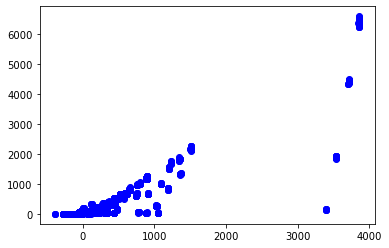

In [208]:
plt.plot(Y_preds_lr,Y_test,'bo')


# Decision Tree Regressor - OneHotEncoder

In [182]:
dtr.fit(X_train,Y_train)
Y_preds_dtr = dtr.predict(X_test)

> **Decision Tree Regressor results:**

In [183]:
model_metrics(Y_test,Y_preds_dtr,X_transformed)

MAE: 184.01769532947029
MSE: 140389.35951695289
RMSE: 374.68568096065917
R Squared: 0.7233199732724229


<AxesSubplot:xlabel='Year', ylabel='Value'>

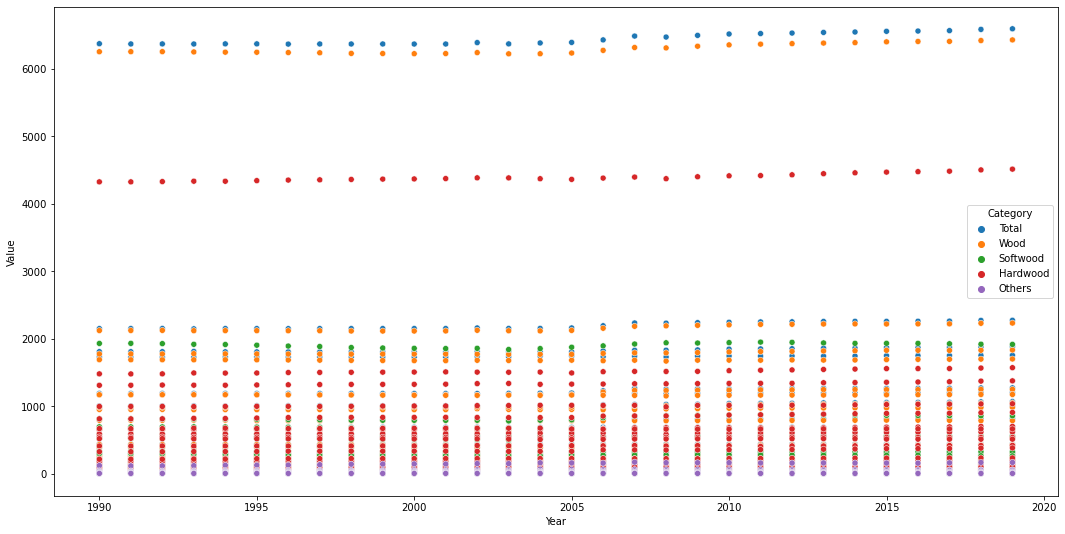

In [174]:
plt.figure(figsize=(18,9))
sns.scatterplot(data=df,x="Year",y="Value",hue="Category")

> Residual

C:\Users\Toni\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


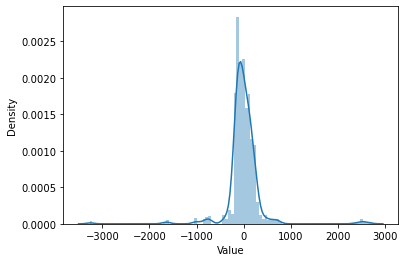

In [99]:
sns.distplot((Y_test-Y_preds_lr),bins=100);

In [254]:
df.dtypes

Category     object
Region       object
Year          int64
Unit         object
Value       float64
dtype: object

In [253]:
df["Year"]=df.Year.dt.year